In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from new_helpers import *
from original_helpers import *
from features import *

# Building the model data

In [3]:
X, Y = build_model_data(extract_features_edge)
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)
print(X.shape)

X [(6250, 7)] and Y [(6250,)]
(6250, 120)


# LogisticRegression

In [ ]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg.fit(X, Y)

In [ ]:
# Predict on the training set
Z = logreg.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))
print('F1-score:', f1_score(Y,Z))
print('Confusion matrix:', pretty_confusion(["road", "bg"], Y, Z))

# KNeighborsClassifier

X, Y = build_model_data(extract_features_edge) with feature.canny(color.rgb2gray(img), sigma=5, high_threshold=0.15, low_threshold=0
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

--> 0.612627271802

In [9]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# Predict on the training set
Z = neigh.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))
print('F1-score:', f1_score(Y,Z))
print('Confusion matrix:', pretty_confusion(["road", "bg"], Y, Z))

# Cross-validation

In [10]:
from sklearn.model_selection import cross_val_score
cr_val = cross_val_score(neigh, X, Y, cv=10, scoring='f1')
print(cr_val)
print(cr_val.mean())

[ 0.65        0.66153846  0.70165746  0.57458564  0.51744186  0.57060519
  0.61176471  0.61861862  0.6         0.62006079]
0.612627271802


# Display prediction

In [ ]:
img_idx = 93
img, gt, Yi, Xi = extract_img_features_new(img_idx, extract_features_edge)
poly = PolynomialFeatures(3)
Xi = poly.fit_transform(Xi)
Zi = neigh.predict(Xi)

display_prediction_alt(img, gt, 16, Zi)
print('F1-score:', f1_score(Yi,Zi))
print('Confusion matrix:', pretty_confusion(["bg", "road"], Yi, Zi))

In [ ]:
from skimage.feature import canny
from skimage import color
edge = canny(color.rgb2gray(img), sigma=5, high_threshold=0.15, low_threshold=0)

In [ ]:
plt.imshow(edge)

# MLPClassifier

In [2]:
from sklearn.neural_network import MLPClassifier

In [100]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=((50,)))
clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [101]:
clf.score(X,Y)

0.73951999999999996

Mean accuracy score: 0.7104
F1-score: 0.125603864734
            t/p             bg           road
             bg            431              9
           road            172             13
Confusion matrix: None


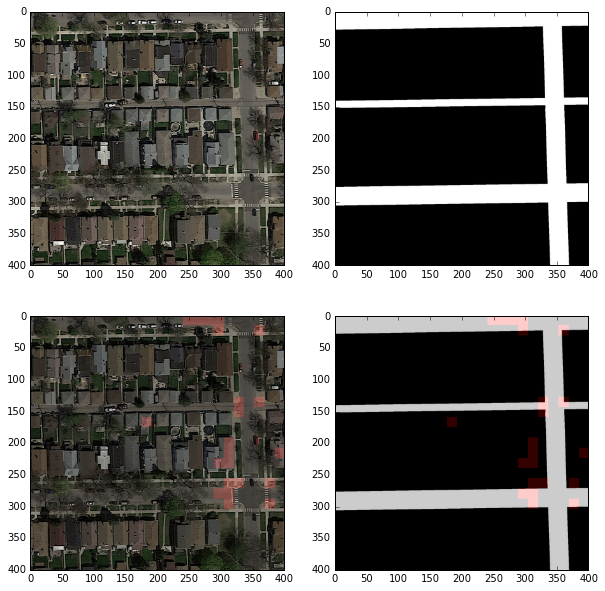

In [102]:
img_idx = 9
img, gt, Yi, Xi = extract_img_features_new(img_idx, extract_features_edge)
poly = PolynomialFeatures(3)
Xi = poly.fit_transform(Xi)
Zi = clf.predict(Xi)
print('Mean accuracy score:', clf.score(Xi,Yi))
print('F1-score:', f1_score(Yi,Zi))
print('Confusion matrix:', pretty_confusion(["bg", "road"], Yi, Zi))
display_prediction_alt(img, gt, 16, Zi)